Nous travaillons avec la version 6.0.3 du Notebook Jupyter en langage R version 3.4.1 (2017-06-30).

# Sujet 6 : Autour du Paradoxe de Simpson
## Importation des données
Le jeux de données est mis à disposition sur Github, néanmoins, pour nous protéger contre une éventuelle disparition ou modification des données d'origine, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [93]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"
data_file = "Subject6_smoking.csv"

if (!file.exists(data_file)) {
    download.file(data_url, data_file, method="auto")
}

data <- read.csv(data_file)
head(data)

Smoker Status Age 
1 Yes    Alive  21.0
2 Yes    Alive  19.3
3 No     Dead   57.5
4 No     Alive  47.1
5 Yes    Alive  81.4
6 No     Alive  36.8

Les données s'affichent correctement.

## Première analyse générale des données
Après une observation brève du fichier csv, nous regardons les caractéristiques du jeux de données.

In [94]:
str(data)
summary(data)

'data.frame':	1314 obs. of  3 variables:
 $ Smoker: Factor w/ 2 levels "No","Yes": 2 2 1 1 2 1 1 2 2 2 ...
 $ Status: Factor w/ 2 levels "Alive","Dead": 1 1 2 1 1 1 1 2 1 1 ...
 $ Age   : num  21 19.3 57.5 47.1 81.4 36.8 23.8 57.5 24.8 49.5 ...


 Smoker      Status         Age       
 No :732   Alive:945   Min.   :18.00  
 Yes:582   Dead :369   1st Qu.:31.30  
                       Median :44.80  
                       Mean   :47.36  
                       3rd Qu.:60.60  
                       Max.   :89.90  

Le jeux de données comprend 1314 observations et regroupe 3 variables : état de tabagisme (oui/non), statut de santé (vivante/morte) et l'âge.

Avec cette première analyse générale, on remarque qu'il y a presque autant de fumeuses que de non fumeuses, environ 1/4 des femmes sont décédées, l'âge minimal est de 18 ans, l'âge maximal de 89 ans et l'âge moyen de 47 ans.

### 1. Analyse de l'effectif et de la mortalité
Nous cherchons dans un premier temps à étudier l'effectif de la population selon l'état de tabagisme et le statut de santé.

In [95]:
#création d'un tableau de fréquence
analyse <- table(data$Smoker,data$Status)
analyse

#transformation du tableau en dataset
analyse_data <- as.data.frame(analyse)
print(analyse_data)

     
      Alive Dead
  No    502  230
  Yes   443  139

  Var1  Var2 Freq
1   No Alive  502
2  Yes Alive  443
3   No  Dead  230
4  Yes  Dead  139


Nous pouvons maintenant calculer la mortalité définit comme le nombre de femmes mortes rapporté au nombre de femmes total selon l'état de tabagisme.

Comme je ne maitrise pas R, j'utilise une méthode peu optimisée et reproductible mais c'est le mieux que je puisse faire.

In [49]:
#création de la variable "mortality"
analyse_data$mortality <- ifelse(analyse_data$Var1=='No', analyse_data$Freq/(analyse_data$Freq[1]+analyse_data$Freq[3]), 
                                 analyse_data$Freq/(analyse_data$Freq[2]+analyse_data$Freq[4]))
analyse_data

#sélection des données d'intérêt
analyse_data_2 <- analyse_data[analyse_data$Var2=="Dead",] # (les valeurs des lignes "vivantes" ne sont pas pertinentes)
analyse_data_2

Var1 Var2  Freq mortality
1 No   Alive 502  0.6857923
2 Yes  Alive 443  0.7611684
3 No   Dead  230  0.3142077
4 Yes  Dead  139  0.2388316

Var1 Var2 Freq mortality
3 No   Dead 230  0.3142077
4 Yes  Dead 139  0.2388316

Nous remarquons que la mortalité est plus élevée chez les non fumeuses. Ce résultat est surprenant car le tabagisme est associé à de nombreuses maladies. Représentons ces données avec un graphique.

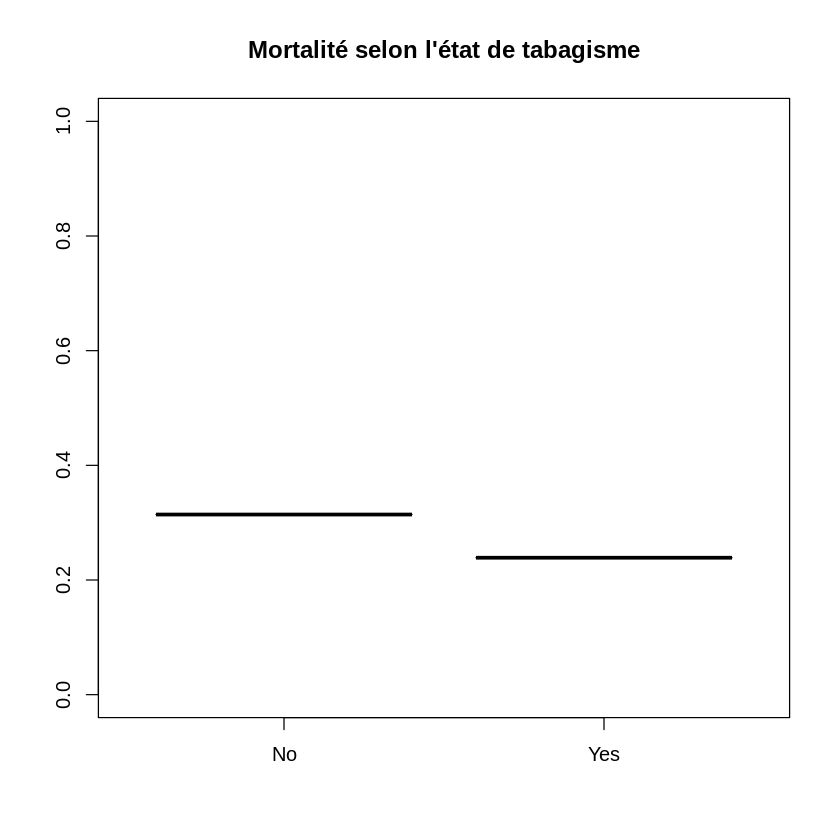

In [107]:
plot(x=analyse_data_2$Var1, y=analyse_data_2$mortality, ylim=c(0,1), main="Mortalité selon l'état de tabagisme")

### 2. Analyse de l'effectif et de la mortalité par groupe d'âge
Etudions maintenant l'effectif de la population selon l'état de tabagisme, le statut de santé et l'âge des individus.

Tout d'abord nous créons une nouvelle variable pour répartir les femmes en 4 groupes selon leur âge : 18-34 ans, 34-54 ans, 54-64 ans, 65 ans et plus.

In [65]:
#création de la variable "AgeGroup"
data$AgeGroup <- ifelse(data$Age<34, '18-34 ans', ifelse(data$Age<54, '34-54 ans', ifelse(data$Age<64, '54-64 ans', 'plus de 65 ans')))   

#création d'un tableau de fréquence
age <- table(data$Smoker,data$Status,data$AgeGroup)
age

#transformation du tableau en dataset
age_data <- as.data.frame(age)
print(age_data)

, ,  = 18-34 ans

     
      Alive Dead
  No    213    6
  Yes   174    5

, ,  = 34-54 ans

     
      Alive Dead
  No    180   19
  Yes   198   41

, ,  = 54-64 ans

     
      Alive Dead
  No     80   39
  Yes    64   51

, ,  = plus de 65 ans

     
      Alive Dead
  No     29  166
  Yes     7   42


   Var1  Var2           Var3 Freq
1    No Alive      18-34 ans  213
2   Yes Alive      18-34 ans  174
3    No  Dead      18-34 ans    6
4   Yes  Dead      18-34 ans    5
5    No Alive      34-54 ans  180
6   Yes Alive      34-54 ans  198
7    No  Dead      34-54 ans   19
8   Yes  Dead      34-54 ans   41
9    No Alive      54-64 ans   80
10  Yes Alive      54-64 ans   64
11   No  Dead      54-64 ans   39
12  Yes  Dead      54-64 ans   51
13   No Alive plus de 65 ans   29
14  Yes Alive plus de 65 ans    7
15   No  Dead plus de 65 ans  166
16  Yes  Dead plus de 65 ans   42


Nous pouvons voir que peu de femmes entre 18 et 34 ans au moment de la première étude sont décedées, contrairement aux femmes de plus de  65 ans (ce qui est assez logique).

Etudions la mortalité dans chacun de ces groupes. Encore une fois, la méthode utilisée n'est clairement pas la plus optimable et reproductible car je connais mal R mais elle me permet d'avoir des données pour la suite.

In [74]:
#création de la variable "mortality" calculée à partir des effectifs de population par état de tabagisme et groupe d'âge
age_data$mortality <- ifelse(age_data$Var1=='No' & age_data$Var3=='18-34 ans', age_data$Freq/(age_data$Freq[1]+age_data$Freq[3]),
                             ifelse(age_data$Var1=='Yes' & age_data$Var3=='18-34 ans', age_data$Freq/(age_data$Freq[2]+age_data$Freq[4]),
                                  ifelse(age_data$Var1=='No' & age_data$Var3=='34-54 ans', age_data$Freq/(age_data$Freq[5]+age_data$Freq[7]),
                                         ifelse(age_data$Var1=='Yes' & age_data$Var3=='34-54 ans', age_data$Freq/(age_data$Freq[6]+age_data$Freq[8]),
                                                ifelse(age_data$Var1=='No' & age_data$Var3=='54-64 ans', age_data$Freq/(age_data$Freq[9]+age_data$Freq[11]),
                                                       ifelse(age_data$Var1=='Yes' & age_data$Var3=='54-64 ans', age_data$Freq/(age_data$Freq[10]+age_data$Freq[12]),
                                                              ifelse(age_data$Var1=='No' & age_data$Var3=='plus de 65 ans', age_data$Freq/(age_data$Freq[13]+age_data$Freq[15]),
                                                                     age_data$Freq/(age_data$Freq[14]+age_data$Freq[16]))))))))                                   
age_data

#sélection des données d'intérêt
age_data_2 <- age_data[age_data$Var2=="Dead",] # (les valeurs des lignes "vivantes" ne sont pas pertinentes)
age_data_2

Var1 Var2  Var3           Freq PopGroup mortality 
1  No   Alive 18-34 ans      213  398      0.97260274
2  Yes  Alive 18-34 ans      174  398      0.97206704
3  No   Dead  18-34 ans        6  398      0.02739726
4  Yes  Dead  18-34 ans        5  398      0.02793296
5  No   Alive 34-54 ans      180  438      0.90452261
6  Yes  Alive 34-54 ans      198  438      0.82845188
7  No   Dead  34-54 ans       19  438      0.09547739
8  Yes  Dead  34-54 ans       41  438      0.17154812
9  No   Alive 54-64 ans       80  234      0.67226891
10 Yes  Alive 54-64 ans       64  234      0.55652174
11 No   Dead  54-64 ans       39  234      0.32773109
12 Yes  Dead  54-64 ans       51  234      0.44347826
13 No   Alive plus de 65 ans  29  244      0.14871795
14 Yes  Alive plus de 65 ans   7  244      0.14285714
15 No   Dead  plus de 65 ans 166  244      0.85128205
16 Yes  Dead  plus de 65 ans  42  244      0.85714286

Var1 Var2 Var3           Freq PopGroup mortality 
3  No   Dead 18-34 ans        6  398      0.02739726
4  Yes  Dead 18-34 ans        5  398      0.02793296
7  No   Dead 34-54 ans       19  438      0.09547739
8  Yes  Dead 34-54 ans       41  438      0.17154812
11 No   Dead 54-64 ans       39  234      0.32773109
12 Yes  Dead 54-64 ans       51  234      0.44347826
15 No   Dead plus de 65 ans 166  244      0.85128205
16 Yes  Dead plus de 65 ans  42  244      0.85714286

Nous remarquons que pour les femmes qui étaient jeunes au moment de la première étude comme pour les femmes de plus de 65 ans, la mortalité est semblable entre les fumeuses et les non fumeuses. En revanche pour les femmes ayant entre 34 et 54 ans, les fumeuses ont une mortalité plus élevée.

Représentons ces données avec un graphique. Comme je ne maitrise pas les graphiques non plus, je créé de nouvelles tables selon le groupe d'âge et produit un graphique pour chaque groupe d'âge.

Var1 Var2 Var3      Freq PopGroup mortality 
3 No   Dead 18-34 ans 6    398      0.02739726
4 Yes  Dead 18-34 ans 5    398      0.02793296

Var1 Var2 Var3      Freq PopGroup mortality 
7 No   Dead 34-54 ans 19   438      0.09547739
8 Yes  Dead 34-54 ans 41   438      0.17154812

Var1 Var2 Var3      Freq PopGroup mortality
11 No   Dead 54-64 ans 39   234      0.3277311
12 Yes  Dead 54-64 ans 51   234      0.4434783

Var1 Var2 Var3           Freq PopGroup mortality
15 No   Dead plus de 65 ans 166  244      0.8512821
16 Yes  Dead plus de 65 ans  42  244      0.8571429

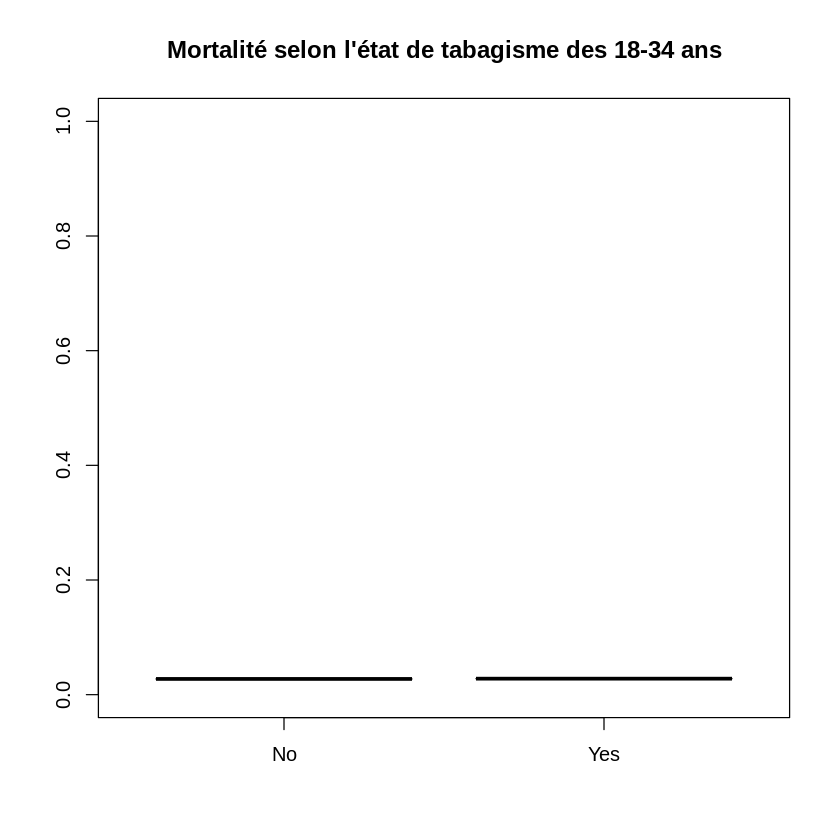

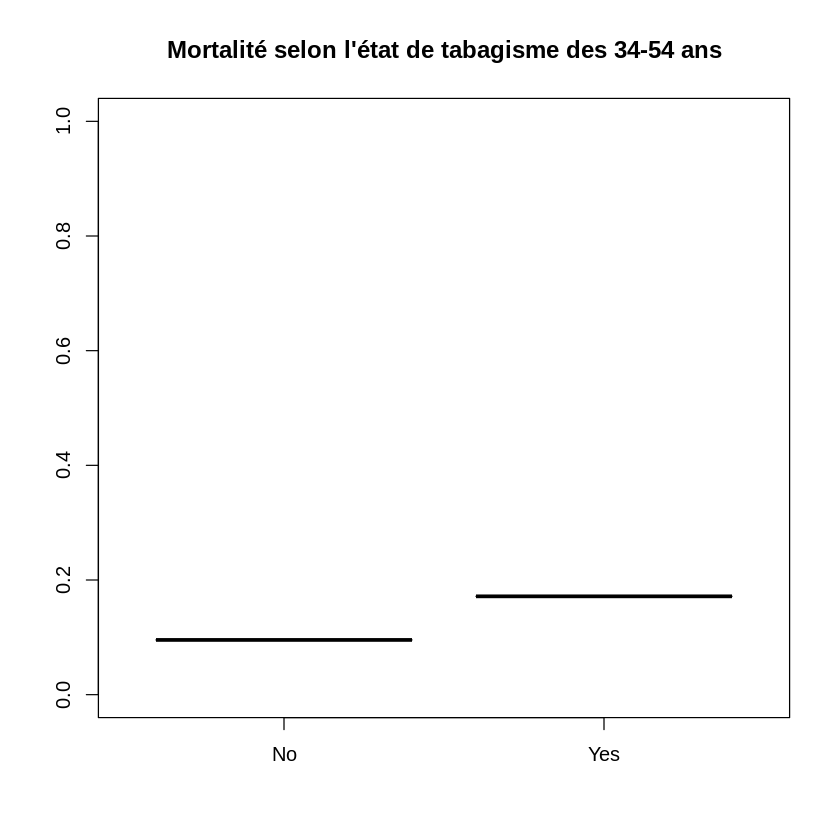

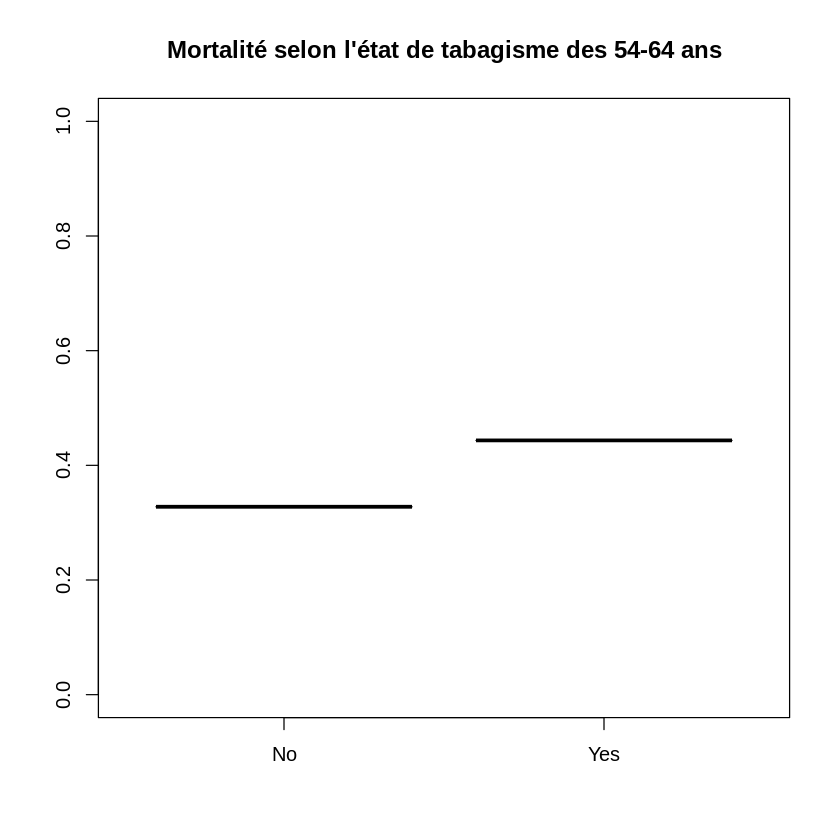

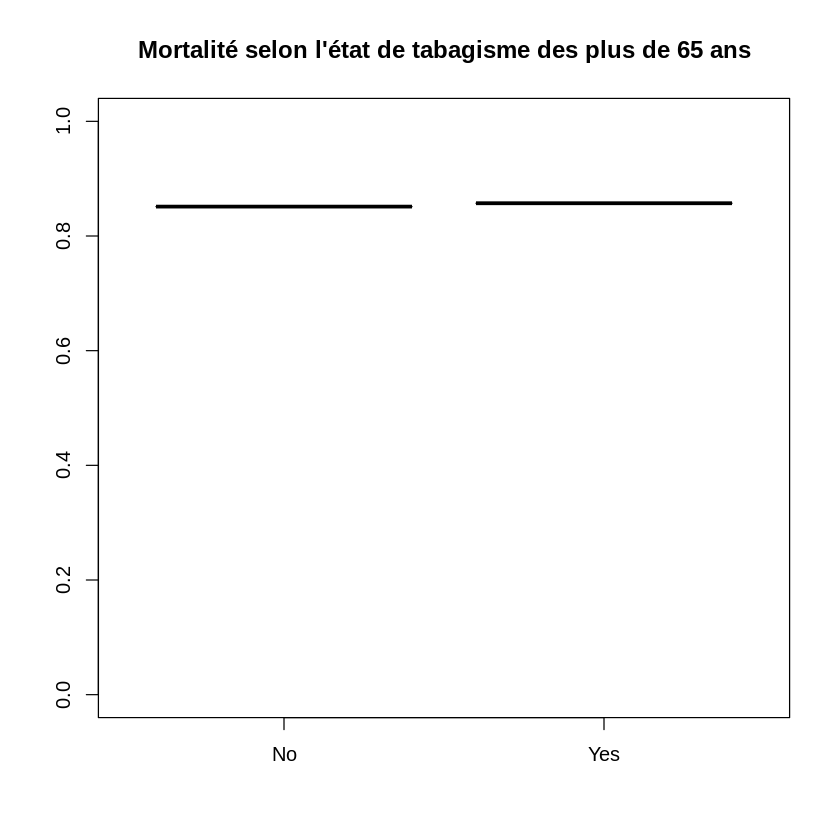

In [108]:
#sélection des données d'intérêt
age_data_18 <- age_data_2[age_data_2$Var3=="18-34 ans",]
age_data_18 

age_data_34 <- age_data_2[age_data_2$Var3=="34-54 ans",]
age_data_34

age_data_54 <- age_data_2[age_data_2$Var3=="54-64 ans",]
age_data_54

age_data_65 <- age_data_2[age_data_2$Var3=="plus de 65 ans",]
age_data_65

#graphiques
plot(x=age_data_18$Var1, y=age_data_18$mortality, ylim=c(0,1), , main="Mortalité selon l'état de tabagisme des 18-34 ans")
plot(x=age_data_34$Var1, y=age_data_34$mortality, ylim=c(0,1), , main="Mortalité selon l'état de tabagisme des 34-54 ans")
plot(x=age_data_54$Var1, y=age_data_54$mortality, ylim=c(0,1), , main="Mortalité selon l'état de tabagisme des 54-64 ans")
plot(x=age_data_65$Var1, y=age_data_65$mortality, ylim=c(0,1), , main="Mortalité selon l'état de tabagisme des plus de 65 ans")

Nous pouvons produire des graphiques par état de tabagisme pour comparer la mortalité selon l'âge mais ça ne nous apprend pas grand chose.

Var1 Var2 Var3           Freq PopGroup mortality 
3  No   Dead 18-34 ans        6  398      0.02739726
7  No   Dead 34-54 ans       19  438      0.09547739
11 No   Dead 54-64 ans       39  234      0.32773109
15 No   Dead plus de 65 ans 166  244      0.85128205

Var1 Var2 Var3           Freq PopGroup mortality 
4  Yes  Dead 18-34 ans       5   398      0.02793296
8  Yes  Dead 34-54 ans      41   438      0.17154812
12 Yes  Dead 54-64 ans      51   234      0.44347826
16 Yes  Dead plus de 65 ans 42   244      0.85714286

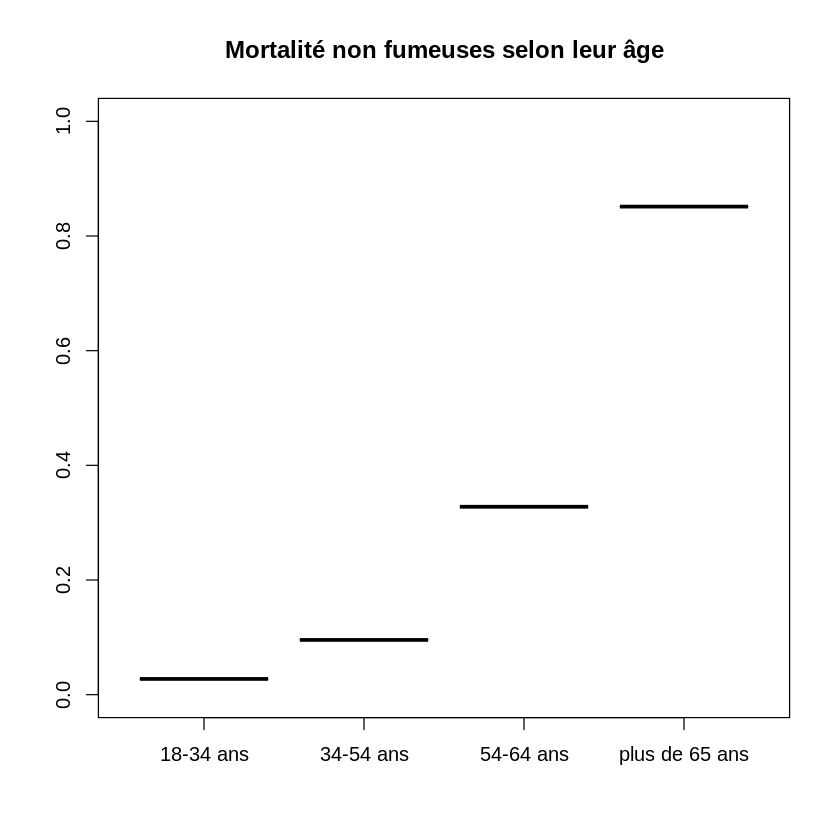

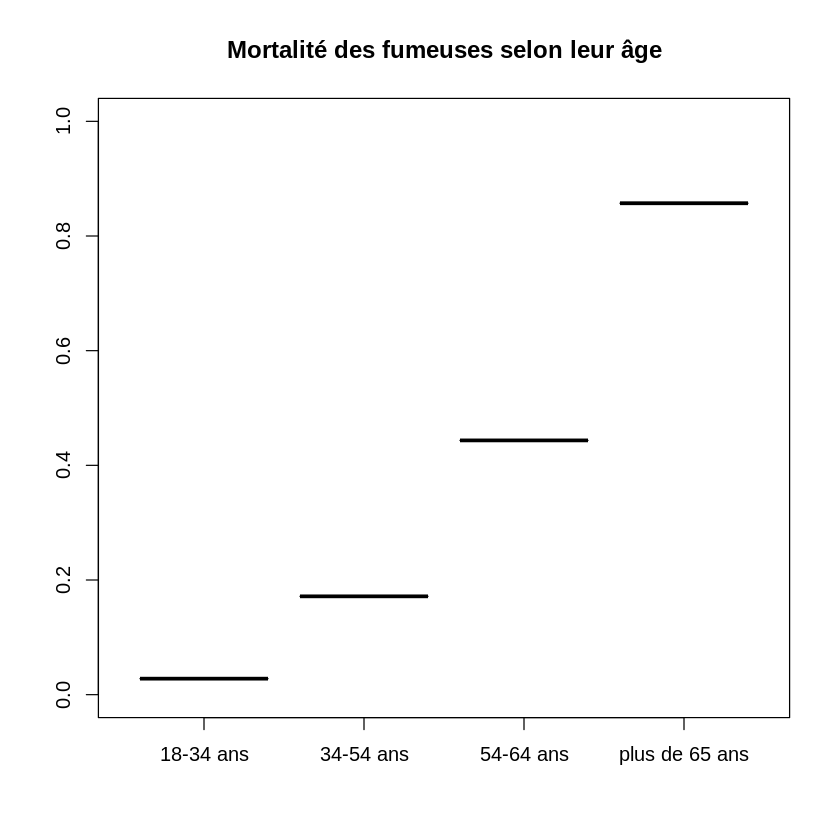

In [111]:
#sélection des variables d'intérêt
age_data_no <- age_data_2[age_data_2$Var1=="No",]
age_data_no 

age_data_yes <- age_data_2[age_data_2$Var1=="Yes",]
age_data_yes

plot(x=age_data_no$Var3, y=age_data_no$mortality, ylim=c(0,1), , main="Mortalité non fumeuses selon leur âge")
plot(x=age_data_yes$Var3, y=age_data_yes$mortality, ylim=c(0,1), , main="Mortalité des fumeuses selon leur âge")

## 2. Régression logistique
Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Nous allons étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses.

Smoker Status Age  Mort Death
1 Yes    Alive  21.0 0    0    
2 Yes    Alive  19.3 0    0    
3 No     Dead   57.5 1    1    
4 No     Alive  47.1 0    0    
5 Yes    Alive  81.4 0    0    
6 No     Alive  36.8 0    0

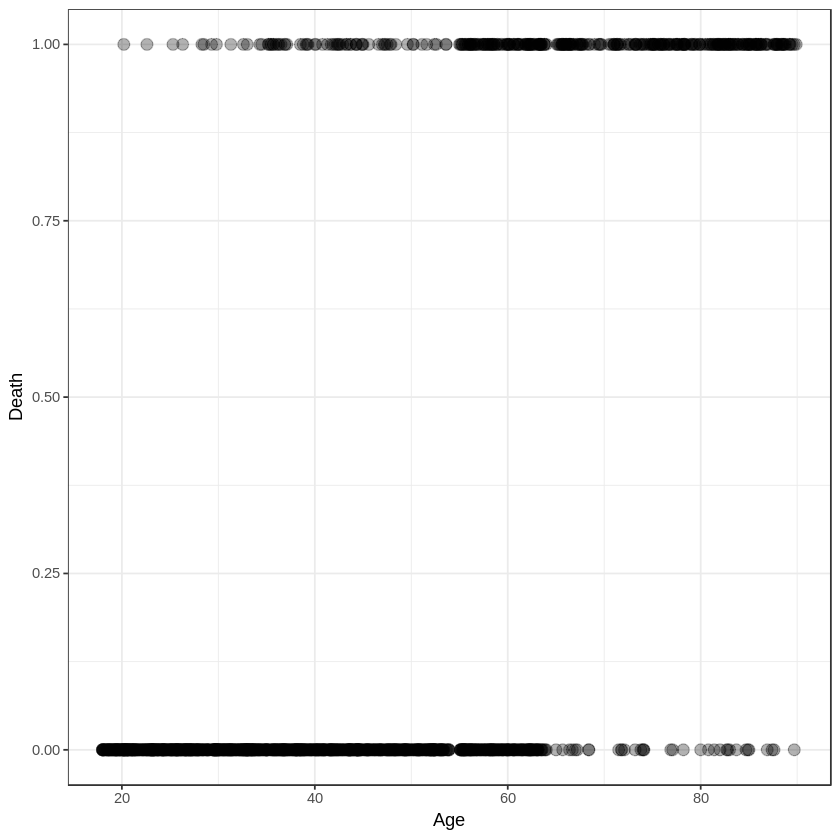

In [116]:
data$Death <- ifelse(data$Status=='Dead', 1, 0)
head(data)

#plot(x=data$Age, y=data$Mort, main="Mort selon l'âge")
ggplot(data,aes(x=Age,y=Death)) + geom_point(alpha=.3,size=3) + theme_bw()

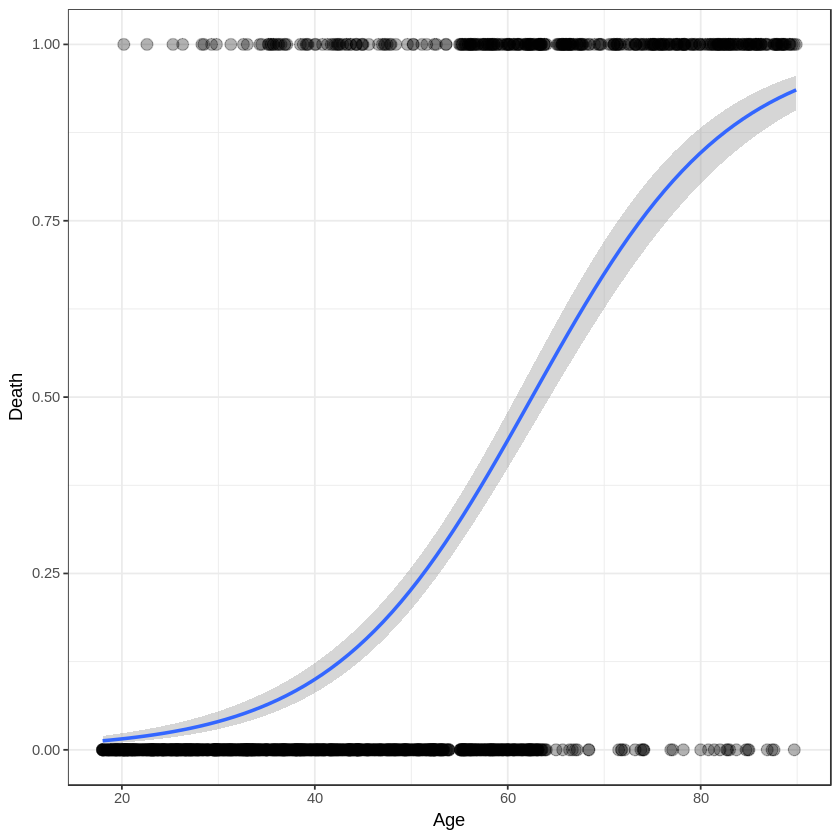

In [118]:
ggplot(data,aes(x=Age,y=Death)) + geom_point(alpha=.3,size=3) + theme_bw() + geom_smooth(method = "glm",
method.args = list(family = "binomial"))

In [123]:
head(data)
data_fumeuses <- data[data$Smoker=='Yes',]
head(data_fumeuses)
data_non_fumeuses <- data[data$Smoker=='No',]
head(data_non_fumeuses)

Smoker Status Age  Mort Death
1 Yes    Alive  21.0 0    0    
2 Yes    Alive  19.3 0    0    
3 No     Dead   57.5 1    1    
4 No     Alive  47.1 0    0    
5 Yes    Alive  81.4 0    0    
6 No     Alive  36.8 0    0

Smoker Status Age  Mort Death
1  Yes    Alive  21.0 0    0    
2  Yes    Alive  19.3 0    0    
5  Yes    Alive  81.4 0    0    
8  Yes    Dead   57.5 1    1    
9  Yes    Alive  24.8 0    0    
10 Yes    Alive  49.5 0    0

Smoker Status Age  Mort Death
3  No     Dead   57.5 1    1    
4  No     Alive  47.1 0    0    
6  No     Alive  36.8 0    0    
7  No     Alive  23.8 0    0    
12 No     Dead   66.0 1    1    
14 No     Alive  58.4 0    0

In [130]:
logistic_reg_fum = glm(data=data_fumeuses, Death ~ Age, family=binomial(link='logit'))
summary(logistic_reg_fum)


Call:
glm(formula = Death ~ Age, family = binomial(link = "logit"), 
    data = data_fumeuses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0745  -0.6464  -0.3756  -0.2013   2.6560  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.508106   0.466221  -11.81   <2e-16 ***
Age          0.088977   0.008721   10.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 639.89  on 581  degrees of freedom
Residual deviance: 480.41  on 580  degrees of freedom
AIC: 484.41

Number of Fisher Scoring iterations: 5


L'estimateur le plus probable du paramètre d'âge est 0.088977 et l'erreur standard de cet estimateur est de 0.008721 et la p-value est <2e-16, autrement dit on peut distinguer un impact particulier de l'âge.

In [134]:
logistic_reg_non_fum = glm(data=data_non_fumeuses, Death ~ Age, family=binomial(link='logit'))
summary(logistic_reg_non_fum)


Call:
glm(formula = Death ~ Age, family = binomial(link = "logit"), 
    data = data_non_fumeuses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4019  -0.5179  -0.2003   0.4728   3.0457  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.795507   0.479430  -14.17   <2e-16 ***
Age          0.107275   0.007806   13.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 911.23  on 731  degrees of freedom
Residual deviance: 519.08  on 730  degrees of freedom
AIC: 523.08

Number of Fisher Scoring iterations: 6


L'estimateur le plus probable du paramètre d'âge est 0.107275 et l'erreur standard de cet estimateur est de 0.007806 et la p-value est <2e-16, autrement dit on peut distinguer un impact particulier de l'âge.

In [135]:
logistic_reg = glm(data=data, Death ~ Age*Smoker, family=binomial(link='logit'))
summary(logistic_reg)


Call:
glm(formula = Death ~ Age * Smoker, family = binomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4019  -0.6010  -0.2854   0.4339   3.0457  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -6.795507   0.479341 -14.177   <2e-16 ***
Age            0.107275   0.007805  13.745   <2e-16 ***
SmokerYes      1.287401   0.668678   1.925   0.0542 .  
Age:SmokerYes -0.018299   0.011703  -1.564   0.1179    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1560.32  on 1313  degrees of freedom
Residual deviance:  999.49  on 1310  degrees of freedom
AIC: 1007.5

Number of Fisher Scoring iterations: 5


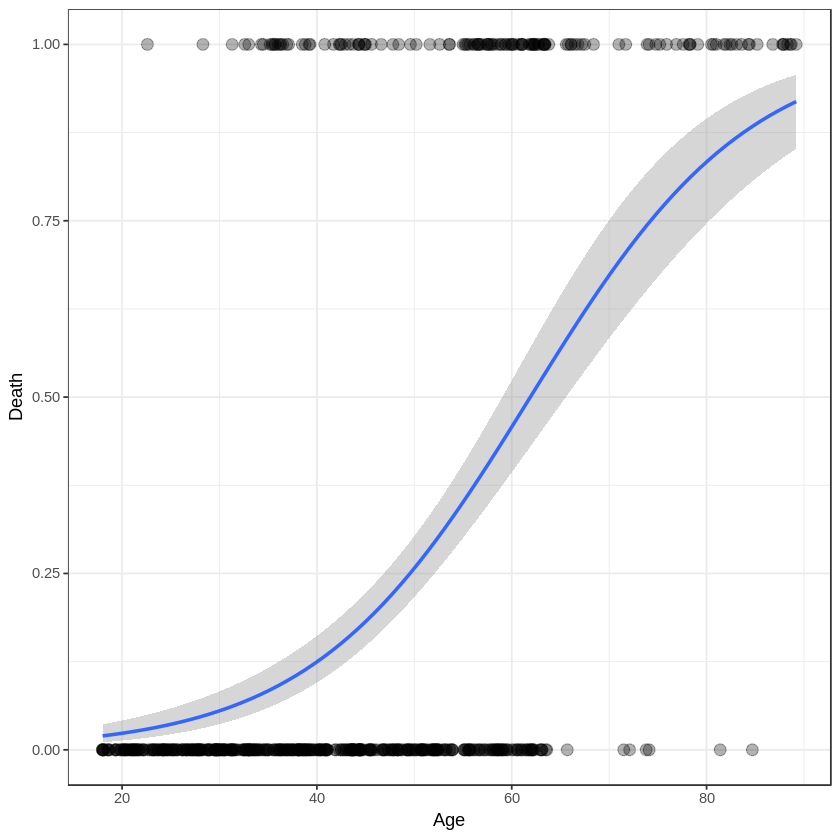

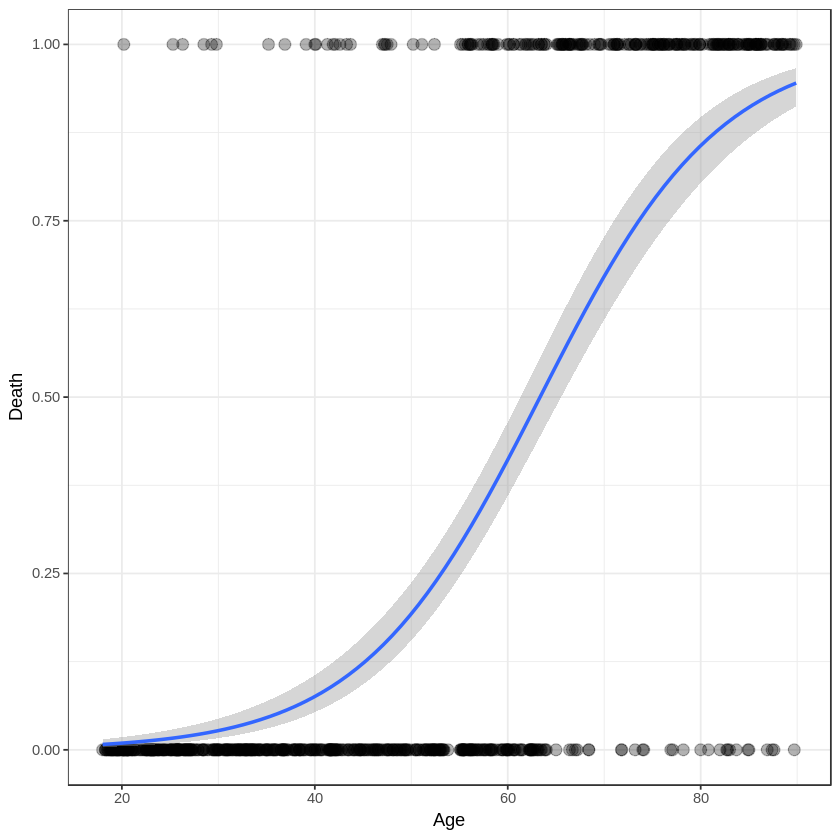

In [127]:
ggplot(data_fumeuses,aes(x=Age,y=Death)) + geom_point(alpha=.3,size=3) + theme_bw() + geom_smooth(method = "glm",
method.args = list(family = "binomial"))

ggplot(data_non_fumeuses,aes(x=Age,y=Death)) + geom_point(alpha=.3,size=3) + theme_bw() + geom_smooth(method = "glm",
method.args = list(family = "binomial"))

In [69]:
age_data$PopGroup <- ifelse(age_data$Var3=='18-34 ans', age_data$Freq[1]+age_data$Freq[2]+age_data$Freq[3]+age_data$Freq[4], 
                            ifelse(age_data$Var3=='34-54 ans', age_data$Freq[5]+age_data$Freq[6]+age_data$Freq[7]+age_data$Freq[8], 
                                  ifelse(age_data$Var3=='54-64 ans', age_data$Freq[9]+age_data$Freq[10]+age_data$Freq[11]+age_data$Freq[12], 
                                        age_data$Freq[13]+age_data$Freq[14]+age_data$Freq[15]+age_data$Freq[16])))
age_data$PopGroupFum <- ifelse(age_data$Var3=='18-34 ans', age_data$Freq[1]+age_data$Freq[2]+age_data$Freq[3]+age_data$Freq[4], 
                            ifelse(age_data$Var3=='34-54 ans', age_data$Freq[5]+age_data$Freq[6]+age_data$Freq[7]+age_data$Freq[8], 
                                  ifelse(age_data$Var3=='54-64 ans', age_data$Freq[9]+age_data$Freq[10]+age_data$Freq[11]+age_data$Freq[12], 
                                        age_data$Freq[13]+age_data$Freq[14]+age_data$Freq[15]+age_data$Freq[16])))

age_data

Var1 Var2  Var3           Freq PopGroup
1  No   Alive 18-34 ans      213  398     
2  Yes  Alive 18-34 ans      174  398     
3  No   Dead  18-34 ans        6  398     
4  Yes  Dead  18-34 ans        5  398     
5  No   Alive 34-54 ans      180  438     
6  Yes  Alive 34-54 ans      198  438     
7  No   Dead  34-54 ans       19  438     
8  Yes  Dead  34-54 ans       41  438     
9  No   Alive 54-64 ans       80  234     
10 Yes  Alive 54-64 ans       64  234     
11 No   Dead  54-64 ans       39  234     
12 Yes  Dead  54-64 ans       51  234     
13 No   Alive plus de 65 ans  29  244     
14 Yes  Alive plus de 65 ans   7  244     
15 No   Dead  plus de 65 ans 166  244     
16 Yes  Dead  plus de 65 ans  42  244